# Deep Q Learning

## Import Dependencies

In [1]:
import os, sys
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

sys.path.append(os.path.abspath("../Environments"))
sys.path.append(os.path.abspath("../Agents"))
sys.path.append(os.path.abspath('../Neural_Networks'))


from Agents.agent import train_agent, action_selection_dueling_q_learning
from Neural_Networks.nn import dueling_neural_network
from Environments.Order_Acceptance_and_Allocation import OAAP
from Agents.utils.learning_and_exploration import epsilon_greedy
from Agents.utils.replay_buffer import Replay_Buffer
from Agents.utils.learning_and_exploration import dueling_q_learning, learning
import torch.nn as nn
import torch.nn.functional as F

# Create the Environment and Define the Neural networks

In [2]:
env = OAAP(episode_length = 20,
    production_lines = 1,
    nbr_resources_per_line = 6,
    resource_capacity = 6,
    min_rev = 1,
    max_rev = 9,
    action_space = [0, 1],
    order_set = None,
    penalty_reward = 20)


current_network = dueling_neural_network(path = '.test.zip', input_dims=14, fc1_dims=256,  fc2_dims=256, n_actions= 2,
                         loss = nn.MSELoss(), activation_function= [F.relu, F.relu], lr = 0.0005, dropout=0.1)

target_network = dueling_neural_network(path = '.testtest.zip', input_dims=14, fc1_dims=256,  fc2_dims=256, n_actions= 2,
                         loss = nn.MSELoss(), activation_function= [F.relu, F.relu], lr = 0.0005, dropout=0.1)

# Create and Train the Agent

average score: []  on training step  0


/home/flo/python_projects/RL/Agents/agent.py:120: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  state = T.tensor([observation], dtype=T.float).to(self.current_network.device)


average score: [np.float64(-43.68)]  on training step  50
average score: [np.float64(-6.0)]  on training step  100
average score: [np.float64(9.18)]  on training step  150
average score: [np.float64(25.32)]  on training step  200
average score: [np.float64(62.36)]  on training step  250
average score: [np.float64(67.54)]  on training step  300
average score: [np.float64(95.84)]  on training step  350
average score: [np.float64(121.12)]  on training step  400
average score: [np.float64(152.44)]  on training step  450
epsilon descent completed
average score: [np.float64(166.16)]  on training step  500
average score: [np.float64(180.64)]  on training step  550
average score: [np.float64(180.0)]  on training step  600
average score: [np.float64(174.96)]  on training step  650
average score: [np.float64(187.1)]  on training step  700
average score: [np.float64(189.58)]  on training step  750
average score: [np.float64(193.08)]  on training step  800
average score: [np.float64(184.96)]  on t

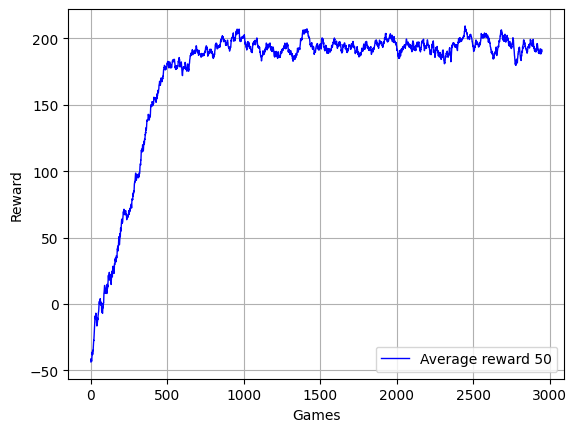

[np.float64(-43.68),
 np.float64(-41.24),
 np.float64(-42.84),
 np.float64(-42.02),
 np.float64(-43.18),
 np.float64(-43.2),
 np.float64(-41.24),
 np.float64(-37.64),
 np.float64(-36.14),
 np.float64(-38.06),
 np.float64(-36.46),
 np.float64(-38.16),
 np.float64(-35.84),
 np.float64(-34.84),
 np.float64(-35.42),
 np.float64(-33.4),
 np.float64(-32.26),
 np.float64(-28.18),
 np.float64(-27.3),
 np.float64(-27.66),
 np.float64(-25.1),
 np.float64(-21.68),
 np.float64(-19.66),
 np.float64(-17.66),
 np.float64(-14.76),
 np.float64(-11.44),
 np.float64(-10.04),
 np.float64(-9.04),
 np.float64(-11.14),
 np.float64(-10.06),
 np.float64(-10.16),
 np.float64(-7.94),
 np.float64(-7.0),
 np.float64(-7.18),
 np.float64(-8.38),
 np.float64(-9.78),
 np.float64(-11.9),
 np.float64(-14.46),
 np.float64(-13.54),
 np.float64(-16.6),
 np.float64(-14.82),
 np.float64(-14.54),
 np.float64(-14.04),
 np.float64(-13.08),
 np.float64(-10.64),
 np.float64(-11.88),
 np.float64(-9.92),
 np.float64(-8.32),
 np.flo

In [4]:
action_space = [0, 1]
agent = train_agent(action_space = action_space,
                          replace = 50,
                          epsilon = epsilon_greedy(eps_start= 1, eps_end = 0.03, eps_dec = 0.0001),
                          replay = Replay_Buffer(max_size = 50000, batch_size = 512, input_dims = 14))
agent.set_action_selection(action_selection_dueling_q_learning(current_network, target_network, action_space))
agent.set_networks(current_network = current_network, target_network = target_network,)
agent.set_learning_strategy(learning, dueling_q_learning)
agent.train(training_steps = 3000, environment = env, print_results = True, average=50)